In [ ]:
import tkwant 
import kwant
import numpy as np
import matplotlib
from math import sin, pi, cos 
import matplotlib.pyplot as pltss
from pylab import *

(Site(kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.5, 0.09622504], 'graphyne0', 1), array([0, -1])), Site(kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.5, 0.28867513], 'graphyne1', 1), array([0, -1])), Site(kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.66666667, 0.38490018], 'graphyne3', 1), array([0, -1])), Site(kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [0.83333333, 0.48112522], 'graphyne4', 1), array([0, -1])), Site(kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [1.0, 0.57735027], 'graphyne5', 1), array([0, -1])), Site(kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [1.16666667, 0.48112522], 'graphyne6', 1), array([0, -1])), Site(kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [1.0, 0.76980036], 'graphyne7', 1), array([0, -1])), Site(kwant.lattice.Monatomic([[1.0, 0.0], [0.5, 0.8660254037844386]], [1.0, 0.76980036], 'graphyne7', 1), array([1, -

/home/simula/anaconda3/envs/tkwant/lib/python3.7/site-packages/ipykernel_launcher.py:182: RuntimeWarning: Kwant's plotting functions have
the side effect of selecting the matplotlib backend. To avoid this warning,
import matplotlib.pyplot, matplotlib.backends or call matplotlib.use().


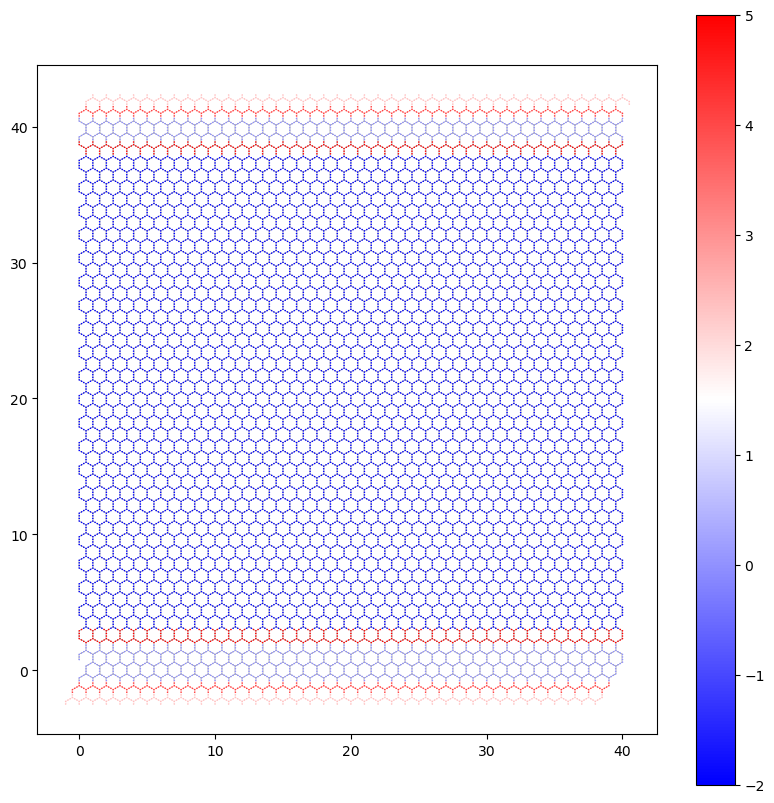

error: (lrwork>=max(24*n,1)||lrwork==-1) failed for 10th keyword lrwork: zheevr:lrwork=1

In [4]:
def make_fabry_perot_system():

    global Lx, Ly, t2, t3

    alat  = 1

    a1    = array([alat, 0])

    a2    = array([alat/2, sqrt(3)*alat/2])

    lat   = [a1, a2]

    # Cartesian coordinates of graphyne sites

    sites = [
        [0.5       , 0.09622504],
        [0.5       , 0.28867513],
        [0.33333333, 0.38490018],
        [0.66666667, 0.38490018],
        [0.83333333, 0.48112522],
        [1.        , 0.57735027],
        [1.16666667, 0.48112522],
        [1.        , 0.76980036]
    ]

    graphyne = kwant.lattice.general(lat, sites, norbs=1, name='graphyne')
    a,b,c,d,e,f,g,h = graphyne.sublattices

    def rectangle(pos):
        x, y = pos
        return (0 <= x <= Lx and 0.7 <= y <= Ly + 0.65)

    def rectangle_lead0(pos):
        x, y = pos
        return (0.4 < x <= Lx)

    def rectangle_lead1(pos):
        x, y = pos
        return ((-Ly * a2[0] - 3.5) <= x <= (Ly * a2[0] - 1.5 - 2.0))

    def onsite(site):
        return 0.0

    syst = kwant.Builder()
    syst[graphyne.shape(rectangle, (0, 0))] = onsite

    sym0 = kwant.TranslationalSymmetry(graphyne.vec([0, -1]))
    lead0 = kwant.Builder(sym0)
    lead0[graphyne.shape(rectangle_lead0, (0, 0))] = onsite

    sym1 = kwant.TranslationalSymmetry(graphyne.vec([0, 1]))
    lead1 = kwant.Builder(sym1)
    lead1[graphyne.shape(rectangle_lead1, (Ly * a2[0], Ly))] = onsite

    hoppings0 = (((0, 0), a, b),)
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings0]] = t2
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings0]] = t2
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings0]] = t2

    hoppings1 = (((0, 1), a, h),)
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings1]] = t3
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings1]] = t3
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings1]] = t3

    hoppings2 = (((0, 0), b, c),)
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = t2
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = t2
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = t2

    hoppings3 = (((0, 0), b, d),)
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings3]] = t2
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings3]] = t2
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings3]] = t2

    hoppings4 = (((1, 0), c, g),)
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings4]] = t3
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings4]] = t3
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings4]] = t3

    hoppings5 = (((0, 0), d, e),)
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings5]] = t3
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings5]] = t3
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings5]] = t3

    hoppings6 = (((0, 0), e, f),)
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings6]] = t2
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings6]] = t2
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings6]] = t2

    hoppings7 = (((0, 0), f, h),)
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings7]] = t2
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings7]] = t2
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings7]] = t2

    hoppings8 = (((0, 0), f, g),)
    syst[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings8]] = t2
    lead0[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings8]] = t2
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings8]] = t2

    # -----------------------------------
    # -----------------------------------
    # -----------------------------------
    # Bottom barrier

    def bottom_barrier(pos):
        x, y = pos
        return (0 <= x <= Lx and 2 <= y <= 3)

    def onsite_barrier(site):
        return 5.0

    syst[graphyne.shape(bottom_barrier, (0, 2))] = onsite_barrier

    # Top barrier

    def top_barrier(pos):
        x, y = pos
        return (0 <= x <= Lx and 38 <= y < 39)

    syst[graphyne.shape(top_barrier, (0, 38))] = onsite_barrier

    # Internal region

    def internal(pos):
        x, y = pos
        return (0 <= x <= Lx and 3 < y < 38)

    def onsite_internal(site):
        return -2.0

    syst[graphyne.shape(internal, (0, 38))] = onsite_internal

    syst.attach_lead(lead0)
    syst.attach_lead(lead1)

    # kwant.plot(syst,show=False, site_size=0.3, hop_lw=0.2,fig_size=(10, 10))

    return syst, graphyne

# Phase from the time integrated voltage V(t).

def phi(time):

    vb, tau = 0.6, 30.

    if time > tau:

        return vb * (time - tau / 2.)

    return vb / 2. * (time - tau / pi * sin(pi * time / tau))


#**********************************************************************

Lx,Ly = 40,40

t2,t3 = -2.85,-7.5


times = range(220)


syst, lat = make_fabry_perot_system()

print (tkwant.leads.add_voltage(syst, 0, phi))

syst = syst.finalized()



colores = array([ syst.onsites[n][0](site) for n,site in enumerate(syst.sites) ])

kwant.plot(syst, site_color=colores, site_size=0.3,fig_size=(10, 10),cmap='bwr', );


hoppings = [(lat.sublattices[0](-Lx/2 -3,Ly+6), lat.sublattices[7](-Lx/2 -3,Ly+5)),

            (lat.sublattices[0](-Lx/2 -2,Ly+6), lat.sublattices[7](-Lx/2 -2,Ly+5)),

            (lat.sublattices[0](-Lx/2 -1,Ly+6), lat.sublattices[7](-Lx/2 -1,Ly+5)),

            (lat.sublattices[0](-Lx/2 ,Ly+6), lat.sublattices[7](-Lx/2 ,Ly+5)),

            (lat.sublattices[0](-Lx/2 +1,Ly+6), lat.sublattices[7](-Lx/2 +1,Ly+5)),

            (lat.sublattices[0](-Lx/2 +2,Ly+6), lat.sublattices[7](-Lx/2 +2,Ly+5)),

            (lat.sublattices[0](-Lx/2 +3,Ly+6), lat.sublattices[7](-Lx/2 +3,Ly+5)),

            (lat.sublattices[0](-Lx/2 +4,Ly+6), lat.sublattices[7](-Lx/2 +4,Ly+5)),

            (lat.sublattices[0](-Lx/2 +5,Ly+6), lat.sublattices[7](-Lx/2 +5,Ly+5)),

            (lat.sublattices[0](-Lx/2 +6,Ly+6), lat.sublattices[7](-Lx/2 +6,Ly+5)),

            (lat.sublattices[0](-Lx/2 +7,Ly+6), lat.sublattices[7](-Lx/2 +7,Ly+5)),

            (lat.sublattices[0](-Lx/2 +8,Ly+6), lat.sublattices[7](-Lx/2 +8,Ly+5)),

            (lat.sublattices[0](-Lx/2 +9,Ly+6), lat.sublattices[7](-Lx/2 +9,Ly+5)),

            (lat.sublattices[0](-Lx/2 +10,Ly+6), lat.sublattices[7](-Lx/2 +10,Ly+5)),

            (lat.sublattices[0](-Lx/2 +11,Ly+6), lat.sublattices[7](-Lx/2 +11,Ly+5)),

            (lat.sublattices[0](-Lx/2 +12,Ly+6), lat.sublattices[7](-Lx/2 +12,Ly+5)),

            (lat.sublattices[0](-Lx/2 +13,Ly+6), lat.sublattices[7](-Lx/2 +13,Ly+5)),

            (lat.sublattices[0](-Lx/2 +14,Ly+6), lat.sublattices[7](-Lx/2 +14,Ly+5)),

            (lat.sublattices[0](-Lx/2 +15,Ly+6), lat.sublattices[7](-Lx/2 +15,Ly+5)),

            (lat.sublattices[0](-Lx/2 +16,Ly+6), lat.sublattices[7](-Lx/2 +16,Ly+5)),

            (lat.sublattices[0](-Lx/2 +17,Ly+6), lat.sublattices[7](-Lx/2 +17,Ly+5)),

            (lat.sublattices[0](-Lx/2 +18,Ly+6), lat.sublattices[7](-Lx/2 +18,Ly+5)),

            (lat.sublattices[0](-Lx/2 +19,Ly+6), lat.sublattices[7](-Lx/2 +19,Ly+5)),

            (lat.sublattices[0](-Lx/2 +20,Ly+6), lat.sublattices[7](-Lx/2 +20,Ly+5)),

            (lat.sublattices[0](-Lx/2 +21,Ly+6), lat.sublattices[7](-Lx/2 +21,Ly+5)),

            (lat.sublattices[0](-Lx/2 +22,Ly+6), lat.sublattices[7](-Lx/2 +22,Ly+5)),

            (lat.sublattices[0](-Lx/2 +23,Ly+6), lat.sublattices[7](-Lx/2 +23,Ly+5)),

            (lat.sublattices[0](-Lx/2 +24,Ly+6), lat.sublattices[7](-Lx/2 +24,Ly+5)),

            (lat.sublattices[0](-Lx/2 +25,Ly+6), lat.sublattices[7](-Lx/2 +25,Ly+5)),

            (lat.sublattices[0](-Lx/2 +26,Ly+6), lat.sublattices[7](-Lx/2 +26,Ly+5)),

            (lat.sublattices[0](-Lx/2 +27,Ly+6), lat.sublattices[7](-Lx/2 +27,Ly+5)),

            (lat.sublattices[0](-Lx/2 +28,Ly+6), lat.sublattices[7](-Lx/2 +28,Ly+5)),

            (lat.sublattices[0](-Lx/2 +29,Ly+6), lat.sublattices[7](-Lx/2 +29,Ly+5)),

            (lat.sublattices[0](-Lx/2 +30,Ly+6), lat.sublattices[7](-Lx/2 +30,Ly+5)),

            (lat.sublattices[0](-Lx/2 +31,Ly+6), lat.sublattices[7](-Lx/2 +31,Ly+5)),

            (lat.sublattices[0](-Lx/2 +32,Ly+6), lat.sublattices[7](-Lx/2 +32,Ly+5)),

            (lat.sublattices[0](-Lx/2 +33,Ly+6), lat.sublattices[7](-Lx/2 +33,Ly+5)),

            (lat.sublattices[0](-Lx/2 +34,Ly+6), lat.sublattices[7](-Lx/2 +34,Ly+5)),

            (lat.sublattices[0](-Lx/2 +35,Ly+6), lat.sublattices[7](-Lx/2 +35,Ly+5)),

            (lat.sublattices[0](-Lx/2 +36,Ly+6), lat.sublattices[7](-Lx/2 +36,Ly+5)),]


current_operator = kwant.operator.Current(syst, where=hoppings)


occup = tkwant.manybody.lead_occupation(chemical_potential=-1.8, temperature=1e-6)


state = tkwant.manybody.State(syst, tmax=max(times), occupations=occup, refine=False)

state.refine_intervals(rtol=0.3, atol=0.3)
